In [1]:
import keras

Using TensorFlow backend.
/Users/alvinjin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Load MNIST data from Keras
Images are ecoded as Numpy arrays

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("Training Dataset Shape: {}".format(train_images.shape))

Training Dataset Shape: (60000, 28, 28)


## First 4 samples in Test dataset

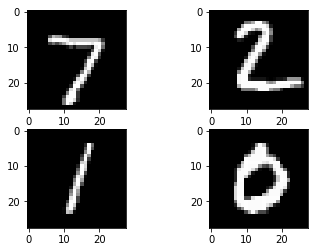

In [4]:
import matplotlib.pyplot as plt
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(test_images[0], cmap='gray')
plt.subplot(222)
plt.imshow(test_images[1], cmap='gray')
plt.subplot(223)
plt.imshow(test_images[2], cmap='gray')
plt.subplot(224)
plt.imshow(test_images[3], cmap='gray')
# show the plot
plt.show()

# Data Preprocessing

## 1. Normalize/Scale data

The pixel values are gray scale between 0 and 255. Normalize it 0-1 range by dividing 255.

In [5]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32')/255

val_images = train_images[:5000]
train_images = train_images[5000:]

test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_images = test_images.astype('float32')/255

## 2. One-hot-encoding on Labels
It is good practice to use a one-hot-encoding of the class values, transforming the vector of class integers into a binary matrix.

In [6]:
from keras.utils import to_categorical

print("Firt 10 Training Labels: {}".format(test_labels[:10]))

train_labels = to_categorical(train_labels)

# Split Validataion set from training set
val_labels = train_labels[:5000]
train_labels = train_labels[5000:]

test_labels = to_categorical(test_labels)

print("After encoding: {}".format(test_labels[:10]))

Firt 10 Training Labels: [7 2 1 0 4 1 4 9 5 9]
After encoding: [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


## Build a ConvNet

In [7]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense

nn = Sequential()

In [8]:
nn.add(Conv2D(filters=20, 
              kernel_size=(5, 5), 
              strides=(1, 1), 
              padding="same", 
              activation='relu', 
              input_shape=(28, 28, 1)))

nn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

nn.add(Conv2D(filters=50, 
              kernel_size=(5, 5), 
              strides=(1, 1), 
              padding="same", 
              activation='relu'))

nn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [9]:
print(nn.output_shape)

(None, 7, 7, 50)


## Below two Fully-connected layers are inherited from last lesson.

In [21]:
nn.add(Flatten())
nn.add(Dense(units=500, activation='relu'))

The output layer consists of 10 neurons since we want to classify digits into 10 classes (0 to 9)

In [11]:
nn.add(Dense(units=10, activation='softmax'))

In [12]:
from keras import optimizers

nn.compile(optimizer=optimizers.Adam(lr=0.001),
           loss='categorical_crossentropy',
           metrics=['accuracy']
          )

## Start training

In [13]:
history = nn.fit(train_images, train_labels,
      epochs=10,
      batch_size=128,
      validation_data=(val_images, val_labels),
      verbose=1
      )

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 101s 2ms/step - loss: 0.1683 - acc: 0.9489 - val_loss: 0.0480 - val_acc: 0.9864
Epoch 2/10
55000/55000 [==============================] - 97s 2ms/step - loss: 0.0436 - acc: 0.9861 - val_loss: 0.0399 - val_acc: 0.9884
Epoch 3/10
55000/55000 [==============================] - 445s 8ms/step - loss: 0.0305 - acc: 0.9901 - val_loss: 0.0352 - val_acc: 0.9890
Epoch 4/10
55000/55000 [==============================] - 98s 2ms/step - loss: 0.0213 - acc: 0.9934 - val_loss: 0.0341 - val_acc: 0.9882
Epoch 5/10
55000/55000 [==============================] - 101s 2ms/step - loss: 0.0168 - acc: 0.9946 - val_loss: 0.0317 - val_acc: 0.9902
Epoch 6/10
55000/55000 [==============================] - 107s 2ms/step - loss: 0.0129 - acc: 0.9959 - val_loss: 0.0503 - val_acc: 0.9870
Epoch 7/10
55000/55000 [==============================] - 101s 2ms/step - loss: 0.0117 - acc: 0.9963 - val_loss: 0.0356 - val

In [14]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total para

## Convoluation Filters

In [20]:
weights = nn.get_weights() # get model weights
conv1_filters = weights[0]
print("The first conv layer's filers: {}\n".format(conv1_filters.shape))
conv1_filters[:,:,:,0] # the first filter 

The first conv layer's filers: (5, 5, 1, 20)



array([[[-0.00294838],
        [ 0.03362969],
        [-0.08557463],
        [ 0.02284927],
        [ 0.0436881 ]],

       [[ 0.04798874],
        [-0.17309083],
        [-0.23320314],
        [-0.05227446],
        [ 0.05326051]],

       [[-0.05660954],
        [-0.35320321],
        [-0.07855018],
        [ 0.14665954],
        [ 0.10088838]],

       [[-0.2324755 ],
        [-0.14694062],
        [-0.06243295],
        [ 0.06652897],
        [ 0.15800895]],

       [[-0.21889977],
        [-0.07005432],
        [ 0.0369084 ],
        [ 0.14429262],
        [ 0.15124311]]], dtype=float32)

## Evaluation and Test

In [16]:
nn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 7s 697us/step


[0.033653665206319558, 0.99109999999999998]

In [17]:
preds = nn.predict_classes(test_images[:4])
probs = nn.predict_proba(test_images[:4])

print("Predicted Classes: {}".format(preds))
print("Predicted Probabilities:\n {}".format(probs))

Predicted Classes: [7 2 1 0]
Predicted Probabilities:
 [[  3.47908195e-16   1.55704525e-17   3.47905718e-15   1.54346544e-12
    2.59434626e-23   6.99588365e-19   2.10560418e-22   1.00000000e+00
    9.61308677e-17   3.83890211e-11]
 [  1.32583763e-13   1.87115694e-14   1.00000000e+00   7.28904740e-17
    7.80622493e-20   3.20550749e-24   4.46997006e-14   2.37722947e-16
    3.03479572e-14   2.20725640e-18]
 [  3.78378129e-09   9.99959826e-01   1.19140503e-10   4.97053787e-13
    1.31937776e-08   5.30408911e-11   3.12725867e-09   3.68579604e-05
    3.37669894e-06   4.20661735e-11]
 [  1.00000000e+00   8.96663453e-18   4.51478937e-15   1.43834199e-15
    4.49764668e-17   7.98107934e-12   3.13514859e-09   9.76453779e-11
    1.41394646e-10   6.10292372e-10]]


## Loss and Accuracy Diagrams

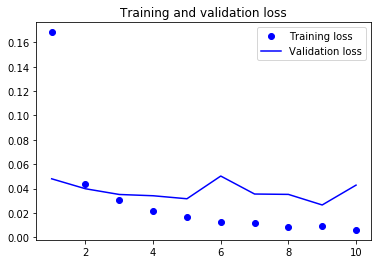

In [18]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

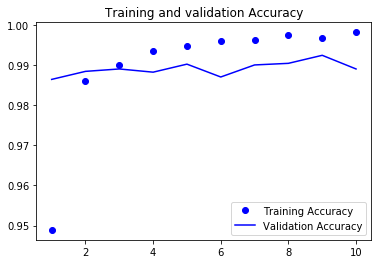

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()

plt.show()